<a href="https://colab.research.google.com/github/MihaiDogariu/Keysight-Deep-Learning-Fundamentals--v2-/blob/main/scripts/Unit_6_Convnet_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import random

In [6]:
# Load MNIST dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))])

trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=16, shuffle=True) # Smaller batch for display

In [7]:
# Define the CNN model
class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, kernel_size=3, padding=1)
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, padding=1)
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc = nn.Linear(7 * 7 * 32, 10)  # Adjust input size based on image size

    def forward(self, x):
        x = self.pool1(self.relu1(self.conv1(x)))
        x = self.pool2(self.relu2(self.conv2(x)))
        x = x.view(-1, 7 * 7 * 32)  # Adjust input size based on image size
        x = self.fc(x)
        return x

In [8]:
# Initialize model, loss function, and optimizer
model = ConvNet()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [9]:
# Training loop
for epoch in range(5):  # Reduced epochs for demonstration
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        if i % 100 == 0:
            print(f'Epoch {epoch + 1}, Batch {i + 1}, Loss: {loss.item()}')

Epoch 1, Batch 1, Loss: 2.299743413925171
Epoch 1, Batch 101, Loss: 0.1834428906440735
Epoch 1, Batch 201, Loss: 0.10435079783201218
Epoch 1, Batch 301, Loss: 0.04188677668571472
Epoch 1, Batch 401, Loss: 0.15520913898944855
Epoch 1, Batch 501, Loss: 0.08483847975730896
Epoch 1, Batch 601, Loss: 0.047490689903497696
Epoch 1, Batch 701, Loss: 0.004879619926214218
Epoch 1, Batch 801, Loss: 0.0588902086019516
Epoch 1, Batch 901, Loss: 0.017111871391534805
Epoch 2, Batch 1, Loss: 0.14052192866802216
Epoch 2, Batch 101, Loss: 0.10106020420789719
Epoch 2, Batch 201, Loss: 0.04071584716439247
Epoch 2, Batch 301, Loss: 0.010140517726540565
Epoch 2, Batch 401, Loss: 0.10647684335708618
Epoch 2, Batch 501, Loss: 0.02636735513806343
Epoch 2, Batch 601, Loss: 0.09167488664388657
Epoch 2, Batch 701, Loss: 0.03772570565342903
Epoch 2, Batch 801, Loss: 0.012428095564246178
Epoch 2, Batch 901, Loss: 0.07548476755619049
Epoch 3, Batch 1, Loss: 0.021355703473091125
Epoch 3, Batch 101, Loss: 0.0441734232

In [ ]:
# Compute test accuracy
correct = 0
total = 0
with torch.no_grad():
  for data in testloader:
      images, labels = data
      images = images.to(device)
      labels = labels.to(device)

      outputs = model(images)
      _, predicted = torch.max(outputs.data, 1)
      total += labels.size(0)
      correct += (predicted == labels).sum().item()

print("Accuracy is {}%".format(100 * correct / total))

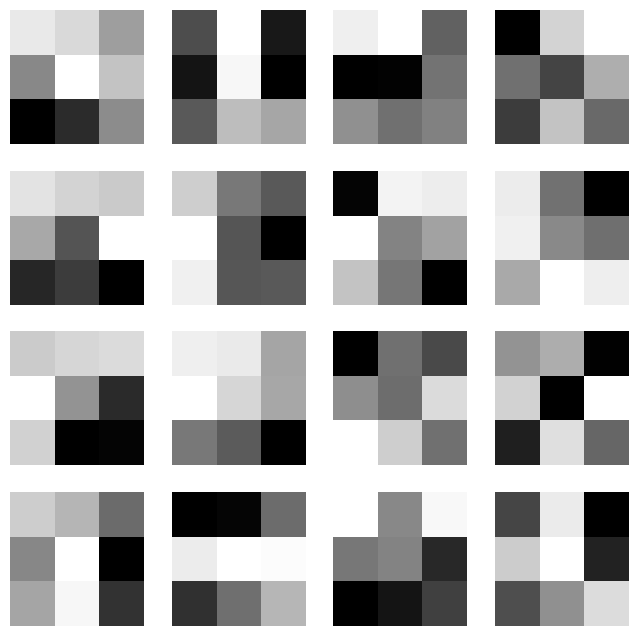

In [10]:
# Display some learned kernels
kernels = model.conv1.weight.data.cpu().numpy()

fig, axs = plt.subplots(4, 4, figsize=(8, 8))
for i in range(16):
    row = i // 4
    col = i % 4
    axs[row, col].imshow(kernels[i, 0], cmap='gray')
    axs[row, col].axis('off')
plt.show()

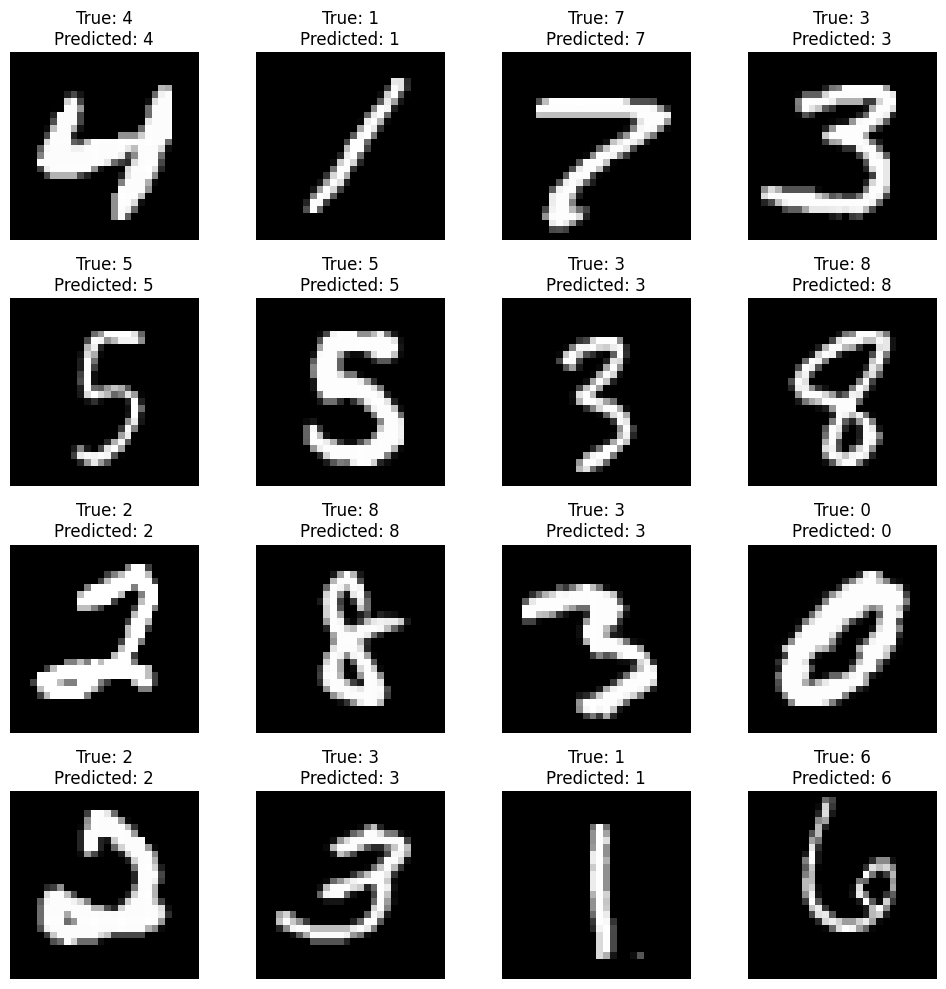

In [11]:
# Get a random batch from the test set
dataiter = iter(testloader)
images, labels = next(dataiter)

# Make predictions
outputs = model(images)
_, predicted = torch.max(outputs, 1)

# Display the images with true and predicted labels
fig, axes = plt.subplots(4, 4, figsize=(10, 10))
for i in range(16):
    ax = axes[i // 4, i % 4]
    ax.imshow(images[i].squeeze().numpy(), cmap='gray')
    ax.set_title(f"True: {labels[i]}\nPredicted: {predicted[i]}")
    ax.axis('off')
plt.tight_layout()
plt.show()